In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [3]:
sns.set_style("ticks",
             rc = {'axes.grid' : True,
                  'grid.linestyle' : 'dashed'})

sns.set_context('poster')
sns.set_palette("Set2")

In [4]:
cwd = os.getcwd().split('/')
HOME = cwd[1:cwd.index('Dropbox')]
HOME = "/"+"/".join(HOME)

chain_folder = '/Downloads/Research-Data/\
COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB_lensing/'

chain_address = HOME + chain_folder

http://wiki.cosmos.esa.int/planckpla2015/index.php/Cosmological_Parameters#Parameter_Chains

In [ ]:
# parameters and label in latex
params = pd.read_csv(chain_address + 'base_plikHM_TTTEEE_lowTEB_lensing.paramnames',
           sep = '\s+', names=[1,2]).fillna('')
params['latex']=params[1] +' '+ params[2]

params.drop([1,2],axis=1, inplace=True)

In [ ]:
# trick to get column names
columns = params.index.values
# two first columns are weight and like
columns = np.append(['weight', 'like'], columns)

In [5]:
# looping over files
df = pd.DataFrame(columns=columns)
for i in range(1,5):
    add = chain_address + 'base_plikHM_TTTEEE_lowTEB_lensing_{}.txt'.format(i)
    df = pd.concat([df,  pd.read_csv(add, delim_whitespace=True,names = columns)])

In [8]:
df[['H0*']].values

array([[ 67.84119],
       [ 67.70569],
       [ 67.88879],
       ..., 
       [ 67.13074],
       [ 66.95862],
       [ 66.95129]])

(array([    24.,    259.,   1817.,   5533.,   9593.,  10107.,   6319.,
          2358.,    552.,     60.]),
 array([ 65.06897 ,  65.546875,  66.02478 ,  66.502685,  66.98059 ,
         67.458495,  67.9364  ,  68.414305,  68.89221 ,  69.370115,
         69.84802 ]),
 <a list of 10 Patch objects>)

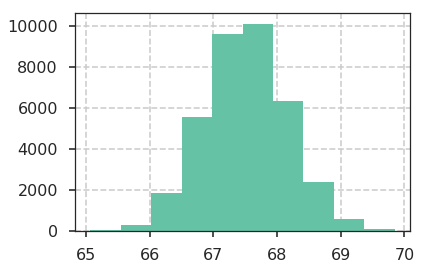

In [13]:
plt.hist(df[['H0*']].values)

In [7]:
for i in  params.index:
    print(i)

omegabh2
omegach2
theta
tau
logA
ns
calPlanck
acib217
xi
asz143
aps100
aps143
aps143217
aps217
aksz
kgal100
kgal143
kgal143217
kgal217
galfEE100
galfEE100143
galfEE100217
galfEE143
galfEE143217
galfEE217
galfTE100
galfTE100143
galfTE100217
galfTE143
galfTE143217
galfTE217
cal0
cal2
H0*
omegal*
omegam*
omegamh2*
omeganuh2*
omegamh3*
sigma8*
s8omegamp5*
s8omegamp25*
s8h5*
rmsdeflect*
zrei*
A*
clamp*
DL40*
DL220*
DL810*
DL1420*
DL2000*
ns02*
yheused*
YpBBN*
DHBBN*
age*
zstar*
rstar*
thetastar*
DAstar*
zdrag*
rdrag*
kd*
thetad*
zeq*
keq*
thetaeq*
thetarseq*
rsDv057*
Hubble057*
DA057*
FAP057*
fsigma8z057*
sigma8z057*
f2000_143*
f2000_x*
f2000_217*
chi2_lensing*
chi2_lowTEB*
chi2_plik*
chi2_prior*
chi2_CMB*


In [8]:
# for camb
lcdm_camb = ['omegabh2', 'omegach2', 'theta', 'tau', 'logA','ns']
# readable params
lcdm_read = ['H0*', 'omegal*', 'omegam*', 'sigma8*', 'A*', 'ns', 'tau', 'rdrag*']

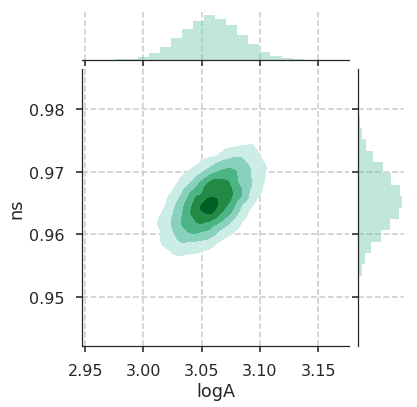

In [200]:
g = sns.JointGrid('logA','ns',df)

g = g.plot_joint(sns.kdeplot,
                 color='b',
                 n_levels=5, 
                 shade=True, shade_lowest = True)

g = g.plot_marginals(sns.distplot,
                     bins=20,
                     kde=False)

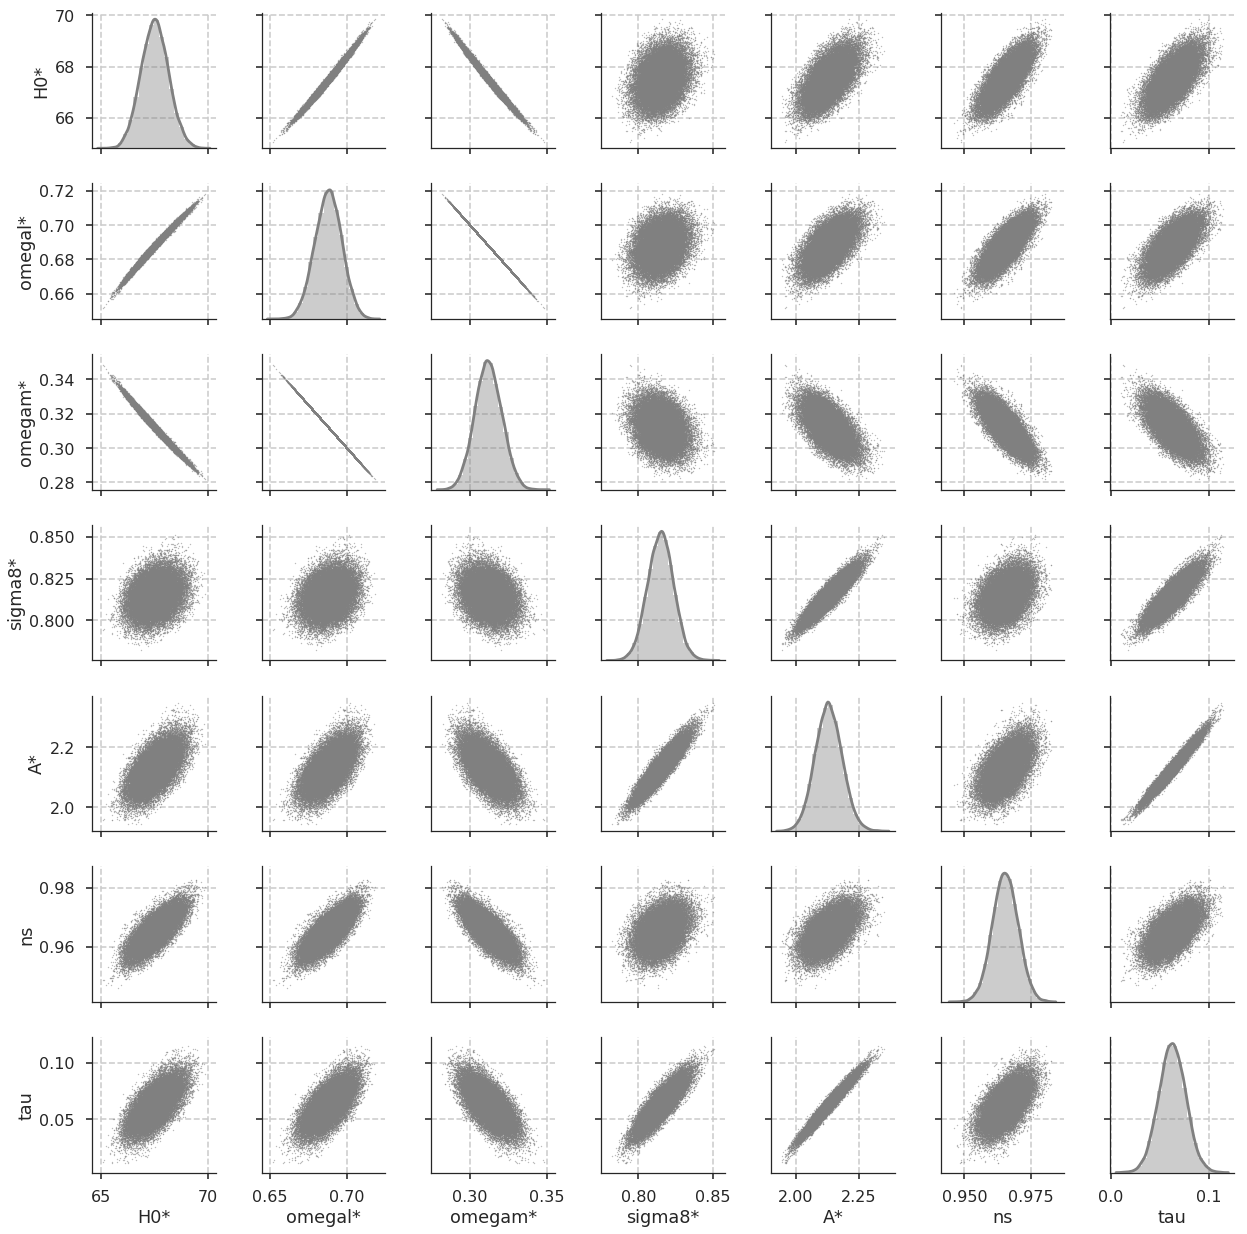

In [213]:
ax = sns.PairGrid(df[lcdm_read], diag_sharey=False)
ax.map_offdiag(plt.scatter, s=1, alpha=0.4, color='gray')
ax.map_diag(sns.distplot, bins=20,color='gray')


plt.show()

In [173]:
# heatmap of correlation matrix

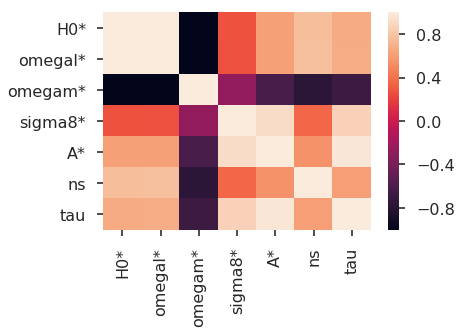

In [176]:
sns.heatmap(df[lcdm_read].corr())
plt.show()

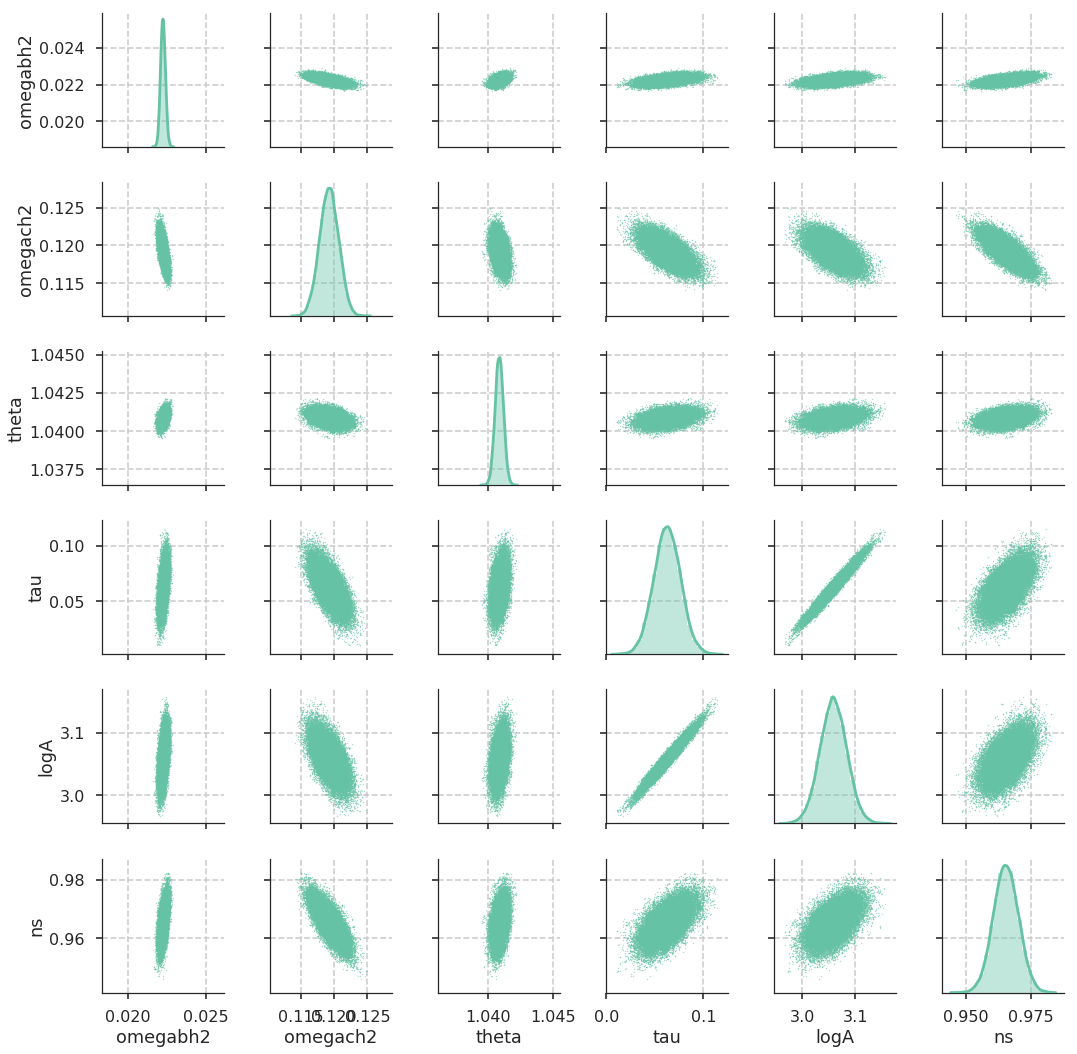

In [182]:
ax = sns.PairGrid(df[lcdm_camb], diag_sharey=False)
ax.map_offdiag(plt.scatter, s=1, alpha=0.4)
ax.map_diag(sns.distplot, bins=20)


plt.show()

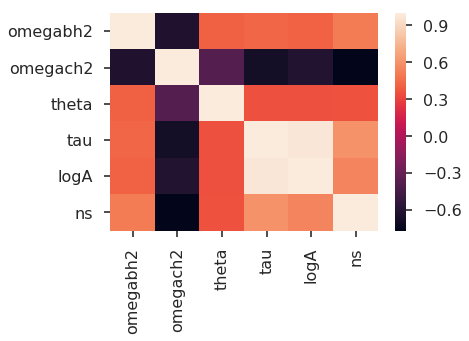

In [203]:
sns.heatmap(df[lcdm_camb].corr())
plt.show()

In [ ]:
sns.distplot(df['rdrag*'])